In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Circle
import os.path
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split


# Custom modules
from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import void_analysis as voidanlys
from modules import gbvoid_dataset as gbvoid

In [ ]:
# Column 1-3:   right hand average orientation (phi1, PHI, phi2 in radians)
# Column 4-6:   left hand average orientation (phi1, PHI, phi2 in radians)
# Column 7:     Misorientation Angle
# Column 8-10:  Misorientation Axis in Right Hand grain
# Column 11-13: Misorientation Axis in Left Hand grain
# Column 14:    length (in microns)
# Column 15:    trace angle (in degrees)
# Column 16-19: x,y coordinates of endpoints (in microns)
# Column 20-21: IDs of right hand and left hand grains

#-- Selected data --
# Column 1:   Selected grain boundary location of the input sample')
# Column 2:   Void parameter value')
# Column 3:   Distance from the grain boundary to the void')
# Column 4:   Void ID')
# Column 5:   Sorted GB by distance from the center of the void')

In [2]:
inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009']

#inputs = ['1_001']

In [3]:
# DATA

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'Misorientation Angle','Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain',
         'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain',
         'Lenght','Trace', 'X start', 'Y start', 'X end','Y end','ID Right Grain', 'ID Left Grain', 'Energy','Void','Void Parameter']

columns_drop=['Mis. X in Right Hand Grain', 'Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain', 
              'ID Right Grain','ID Left Grain', 'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain']

# Drop the position
#columns_drop=['Mis. X in Right Hand Grain', 'Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain', 'X start', 'Y start', 'X end','Y end',
              #'ID Right Grain','ID Left Grain', 'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

# Drop ID grain form the dataset
void_dataset=void_dataset.drop(columns_drop, axis=1)

In [4]:
# Drop negative void fractional parameter, noise - Print the reducion percentage
dv=void_dataset.loc[void_dataset['Void Parameter'] >= 0.0]
reduction=((len(void_dataset)-len(dv))/len(void_dataset))*100
print(reduction,'%')

2.3421542142049803 %


In [5]:
dv

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Energy,Void,Void Parameter
0,0.180,0.250,6.179,5.039,0.678,1.946,55.90,2.000,180.0,0.0,1.15,2.0,1.15,4.36676,0.0,0.0
1,0.180,0.250,6.179,6.066,0.356,0.319,9.33,1.155,150.0,0.0,9.24,1.0,9.81,5.88679,0.0,0.0
2,3.511,0.204,2.663,6.066,0.356,0.319,32.61,1.155,30.0,0.0,28.87,1.0,28.29,5.81996,0.0,0.0
3,3.315,0.286,2.941,3.511,0.204,2.663,7.38,1.155,30.0,0.0,56.58,1.0,56.00,5.68624,0.0,0.0
4,0.204,0.220,6.190,2.959,0.506,3.541,41.18,1.155,150.0,0.0,81.98,1.0,82.56,4.41218,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197292,3.257,0.750,3.106,3.752,0.943,2.148,42.76,1.155,30.0,778.0,430.70,779.0,430.13,0.00000,0.0,0.0
197293,6.134,0.786,0.112,3.244,0.739,3.119,10.13,2.000,60.0,778.0,435.32,779.0,433.59,0.00000,0.0,0.0
197294,3.244,0.739,3.119,6.254,0.203,0.025,36.44,2.000,120.0,778.0,435.32,779.0,437.05,0.00000,0.0,0.0
197295,2.744,0.476,3.606,1.630,0.494,5.410,52.36,1.155,150.0,778.0,705.52,779.0,706.10,0.00000,0.0,0.0


In [6]:
dv.groupby('Void').mean()

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Energy,Void Parameter
Void,,,,,,,,,,,,,,,
0.0,2.987562,0.541467,3.298379,2.985389,0.540202,3.301161,38.994692,15.816067,94.619022,485.156647,526.549395,496.692248,527.220315,2.675321,0.000000
1.0,3.155520,0.553900,3.091346,3.084132,0.549835,3.144787,32.335624,8.121142,96.782478,478.679646,456.615544,484.562832,457.121447,2.725177,0.819403


In [6]:
selected_void_dataset=dv.loc[void_dataset['Void'] == 1.0]
selected_novoid_dataset=dv.loc[void_dataset['Void'] == 0.0]

# Drop Void feature form the selected dataset
selected_void_dataset=selected_void_dataset.drop(['Void'], axis=1)
selected_novoid_dataset=selected_novoid_dataset.drop(['Void'], axis=1)


In [11]:
void_dataset

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Lenght,Trace,X start,Y start,X end,Y end,Sigma Value,Void,Void Parameter
0,0.180,0.250,6.179,5.039,0.678,1.946,55.90,2.000,180.0,0.0,1.15,2.0,1.15,0.0,0.0,0.0
1,0.180,0.250,6.179,6.066,0.356,0.319,9.33,1.155,150.0,0.0,9.24,1.0,9.81,0.0,0.0,0.0
2,3.511,0.204,2.663,6.066,0.356,0.319,32.61,1.155,30.0,0.0,28.87,1.0,28.29,0.0,0.0,0.0
3,3.315,0.286,2.941,3.511,0.204,2.663,7.38,1.155,30.0,0.0,56.58,1.0,56.00,0.0,0.0,0.0
4,0.204,0.220,6.190,2.959,0.506,3.541,41.18,1.155,150.0,0.0,81.98,1.0,82.56,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197292,3.257,0.750,3.106,3.752,0.943,2.148,42.76,1.155,30.0,778.0,430.70,779.0,430.13,0.0,0.0,0.0
197293,6.134,0.786,0.112,3.244,0.739,3.119,10.13,2.000,60.0,778.0,435.32,779.0,433.59,0.0,0.0,0.0
197294,3.244,0.739,3.119,6.254,0.203,0.025,36.44,2.000,120.0,778.0,435.32,779.0,437.05,0.0,0.0,0.0
197295,2.744,0.476,3.606,1.630,0.494,5.410,52.36,1.155,150.0,778.0,705.52,779.0,706.10,0.0,0.0,0.0


In [9]:
trace_hist=selected_void_dataset[['Trace']]

,Trace
305,23.8
341,136.1
356,103.9
431,159.8
2017,175.3
...,...
196230,156.2
196238,79.1
196261,30.0
197030,116.3


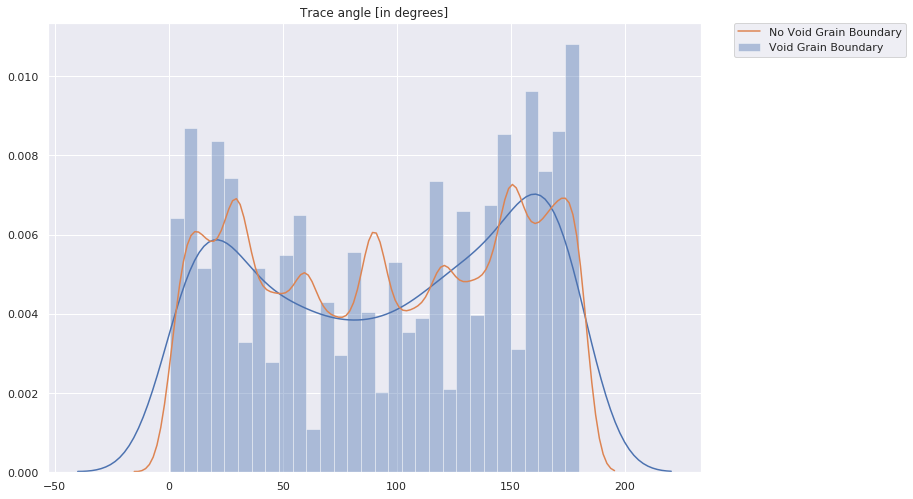

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)},)
plt.title('Trace angle [in degrees]')
sns.distplot(selected_void_dataset[['Trace']],bins=30, label="Void Grain Boundary");
sns.distplot(selected_novoid_dataset[['Trace']], hist=False, label="No Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Trace angle', bbox_inches='tight')

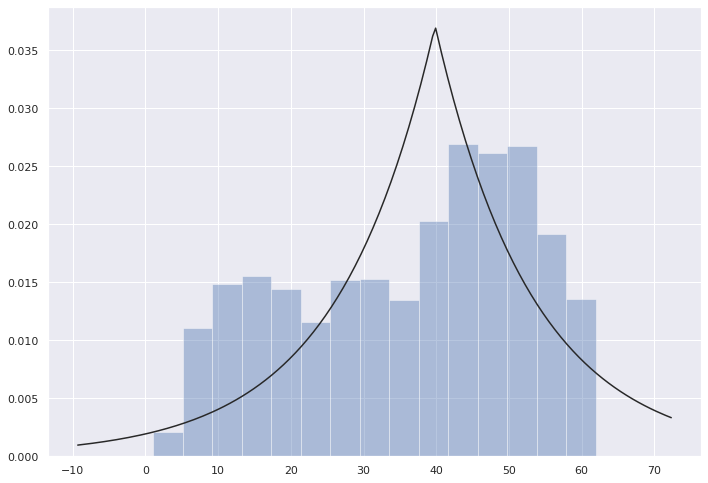

In [17]:
sns.distplot(selected_void_dataset[['Misorientation Angle']], fit=stats.laplace, kde=False)

In [141]:
selected_novoid_dataset['Trace'].value_counts()[:].sort_values(ascending=False)

90.0     9281
150.0    9151
30.0     9023
180.0    7492
60.0     6391
         ... 
38.9        1
118.0       1
168.8       1
171.0       1
139.3       1
Name: Trace, Length: 1414, dtype: int64

In [150]:
selected_novoid_dataset['Trace'].value_counts()[:].sort_values(ascending=False).sum(axis = 0, skipna = True)

195325

In [142]:
selected_void_dataset['Trace'].value_counts()[:].sort_values(ascending=False)

150.0    63
180.0    61
120.0    56
30.0     51
60.0     45
         ..
15.3      1
36.3      1
125.8     1
22.8      1
20.7      1
Name: Trace, Length: 458, dtype: int64

In [151]:
selected_void_dataset['Trace'].value_counts()[:].sort_values(ascending=False).sum(axis = 0, skipna = True)

1979

/home/estanislao/anaconda3/envs/GBL/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


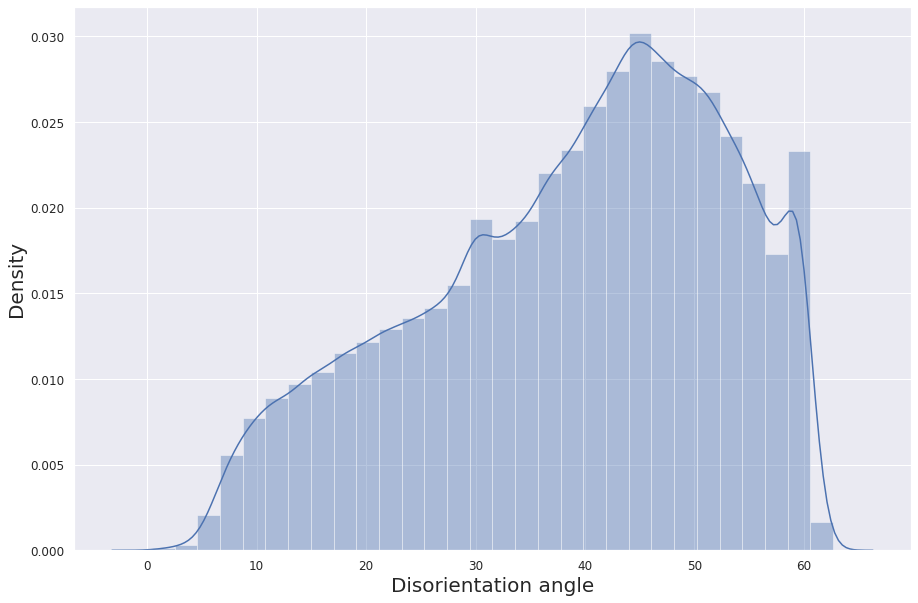

In [66]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(void_dataset[['Misorientation Angle']], bins=30)
#plt.title('Mackenzie distribution',fontsize=22)
plt.xlabel("Disorientation angle",fontsize=20)
plt.ylabel("Density",fontsize=20)

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

plt.savefig('Mackenzie distribution', transparent=True)

NameError: name 'misorientations' is not defined

In [ ]:
sns.distplot(selected_void_dataset[['Misorientation Angle']],bins=30, label="Void Grain Boundary");
plt.title('Misorientation Angle')
sns.distplot(selected_novoid_dataset[['Misorientation Angle']], hist=False, label="No Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Misorientation angle', bbox_inches='tight')

(0, 60.0)

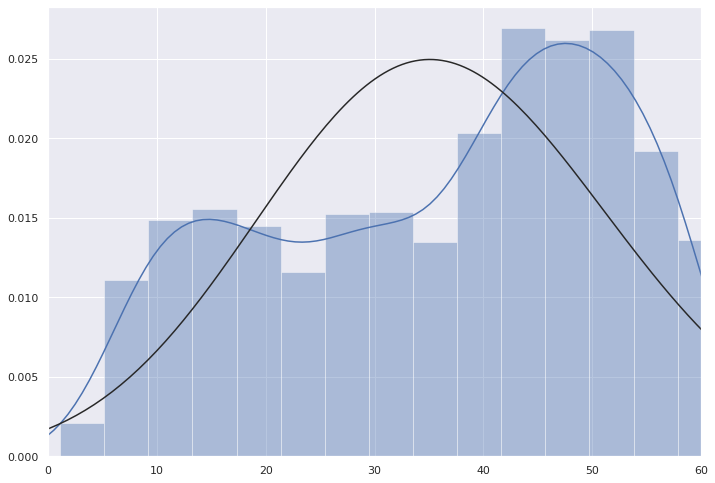

In [182]:
sns.distplot(selected_void_dataset[['Misorientation Angle']], kde=True,fit=stats.gamma);
plt.xlim(0, 60.0)

In [144]:
round=selected_void_dataset['Misorientation Angle'].round(decimals=0)
round.value_counts()[:].sort_values(ascending=False)

48.0    61
44.0    61
53.0    60
52.0    58
47.0    56
        ..
4.0      4
3.0      3
2.0      2
62.0     1
1.0      1
Name: Misorientation Angle, Length: 62, dtype: int64

In [145]:
round_round=selected_novoid_dataset['Misorientation Angle'].round(decimals=0)
round_round.value_counts()[:].sort_values(ascending=False)

45.0    5932
44.0    5882
46.0    5787
47.0    5636
48.0    5449
        ... 
3.0       42
2.0       34
1.0        9
63.0       9
0.0        1
Name: Misorientation Angle, Length: 64, dtype: int64

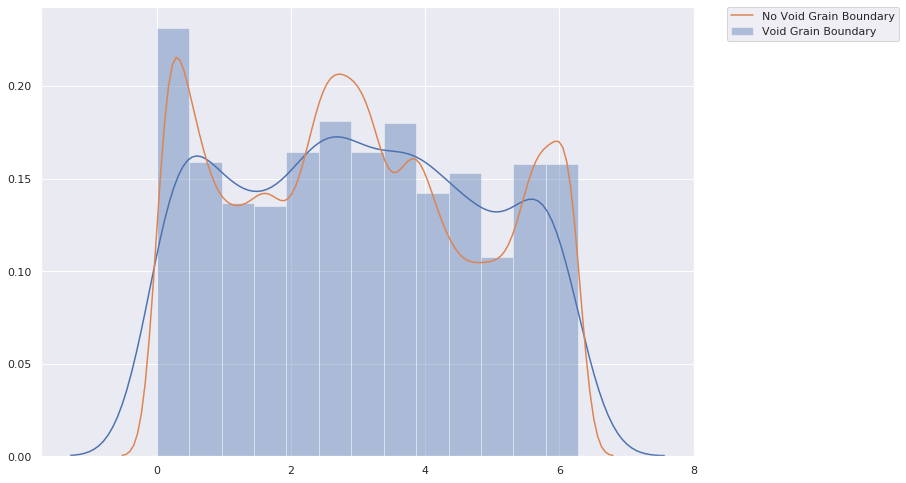

In [146]:
sns.distplot(selected_void_dataset[['phi1_right']], label="Void Grain Boundary");
sns.distplot(selected_novoid_dataset[['phi1_right']], hist=False, label="No Void Grain Boundary");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

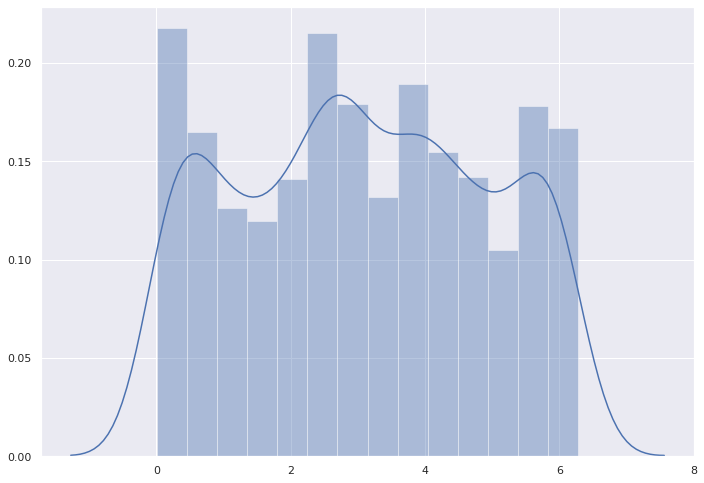

In [148]:
sns.distplot(selected_void_dataset[['phi1_left']]);

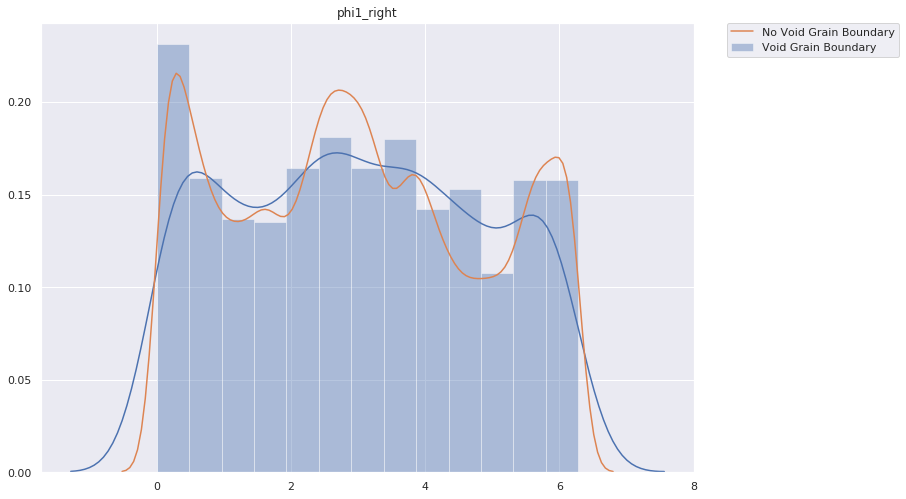

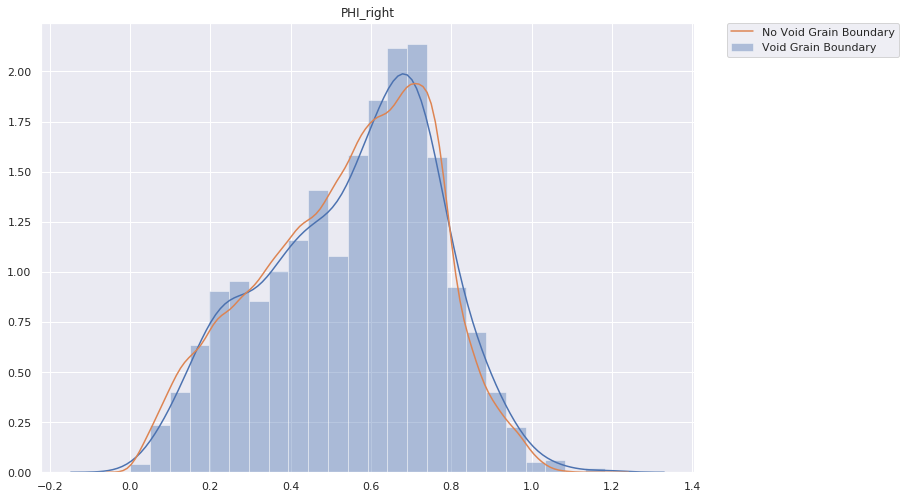

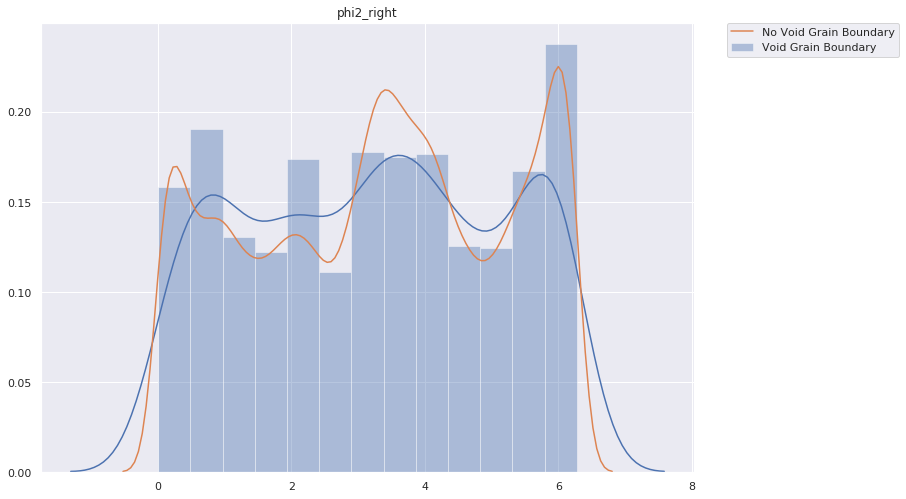

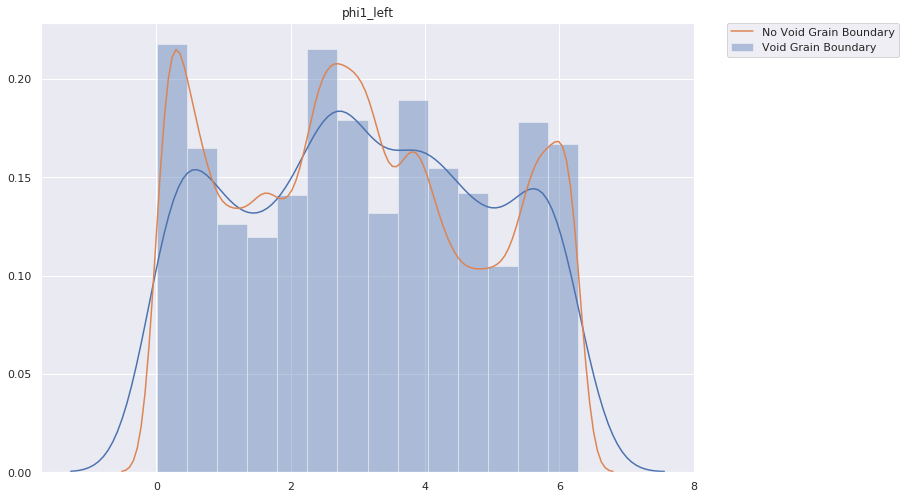

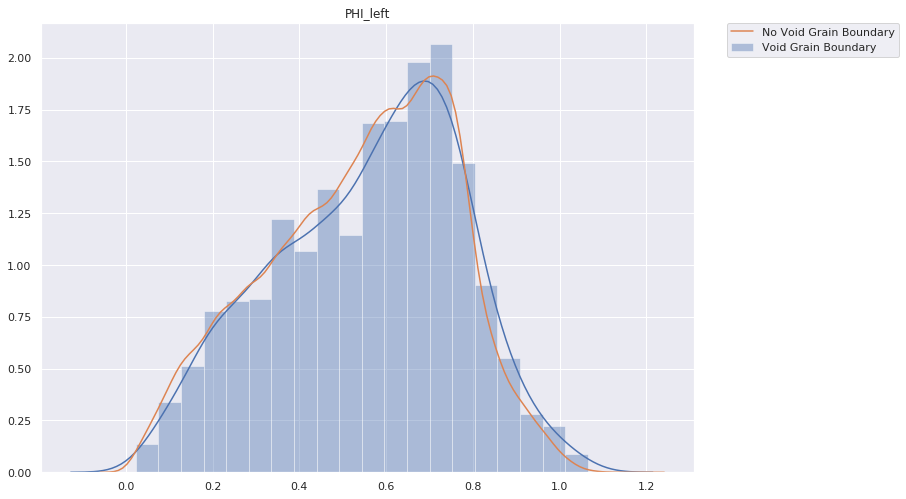

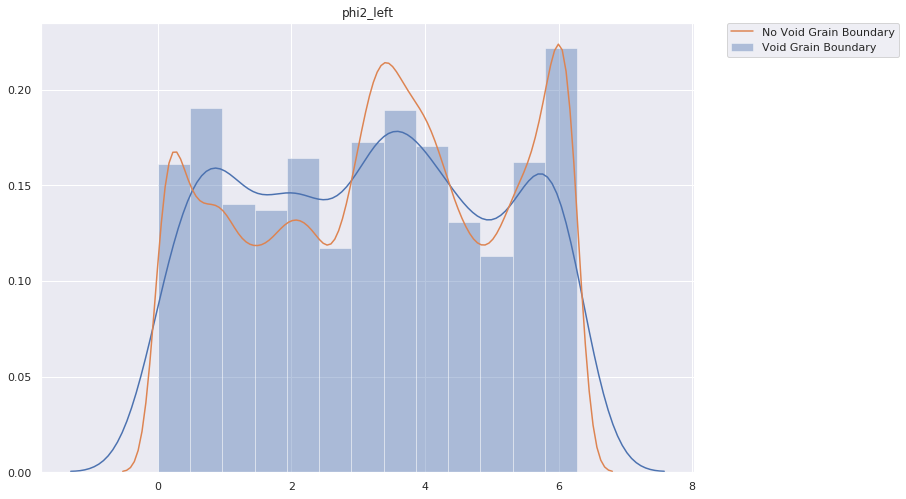

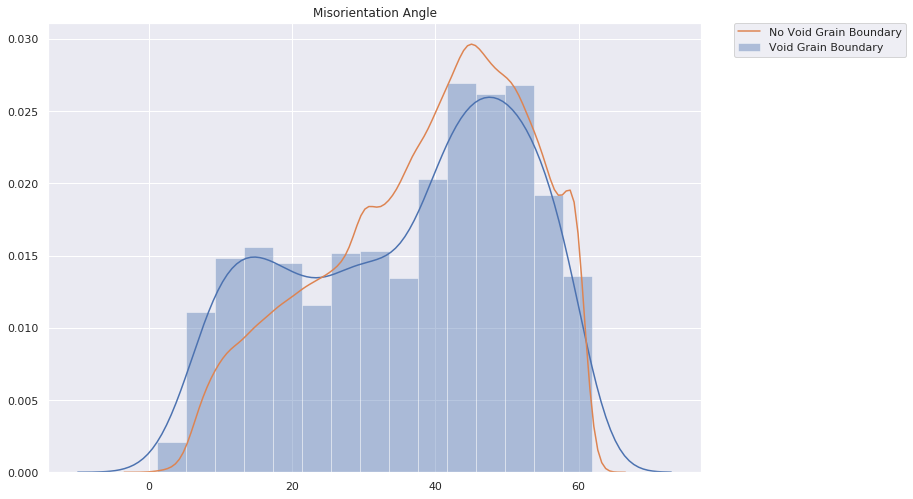

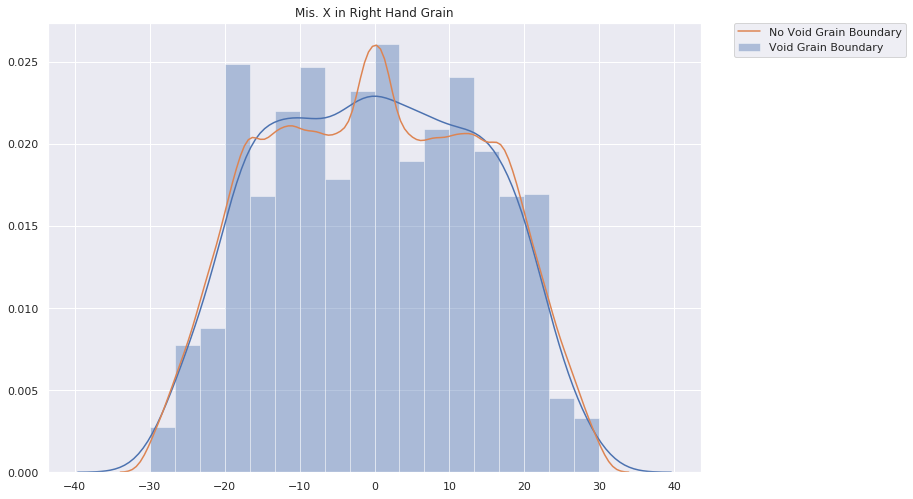

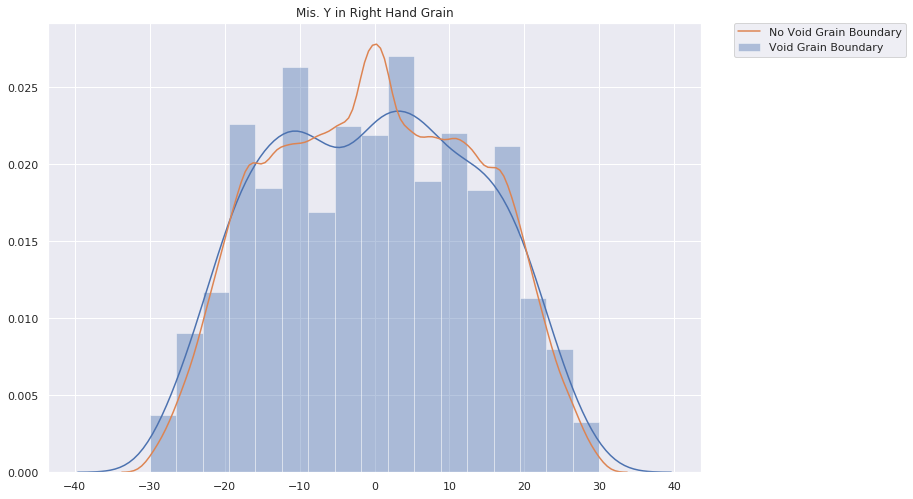

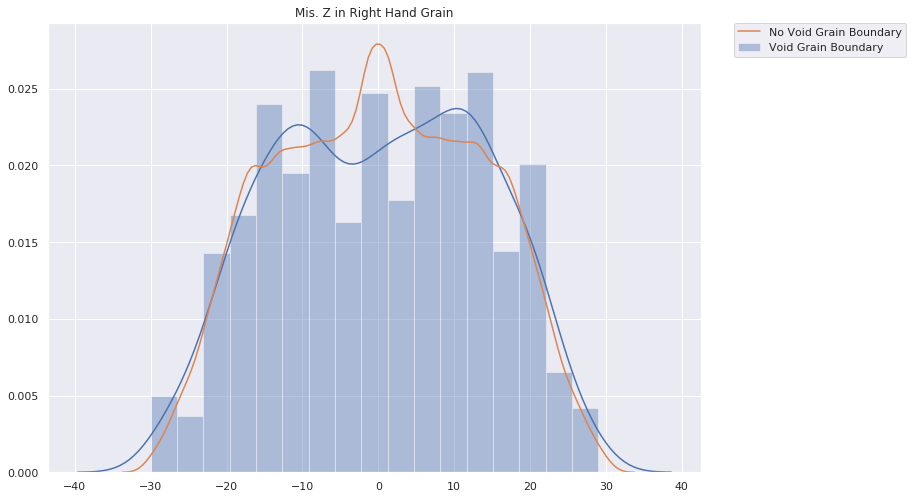

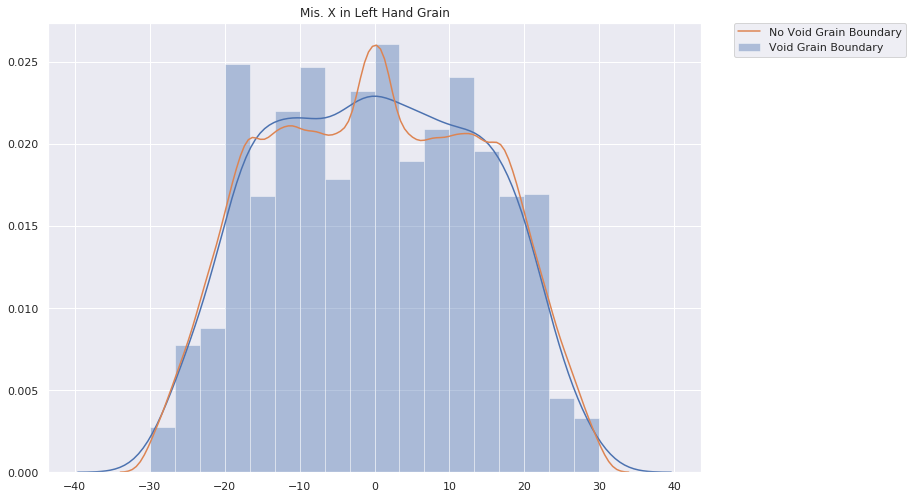

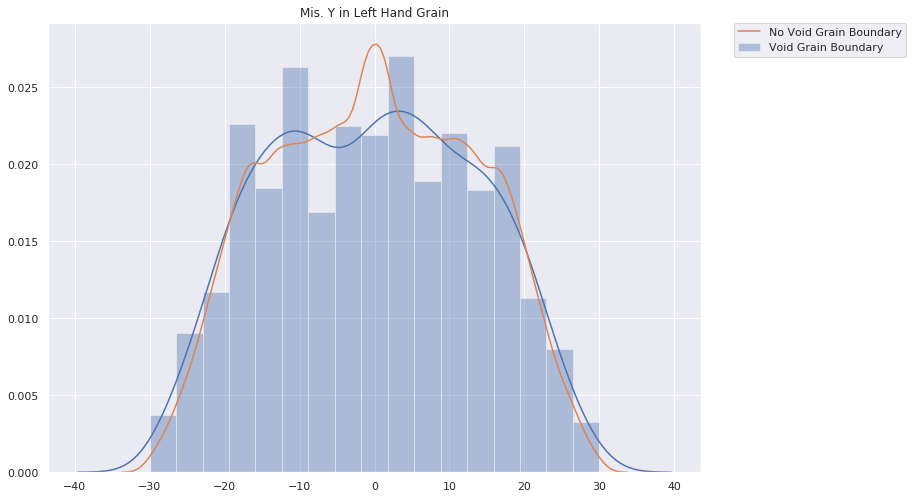

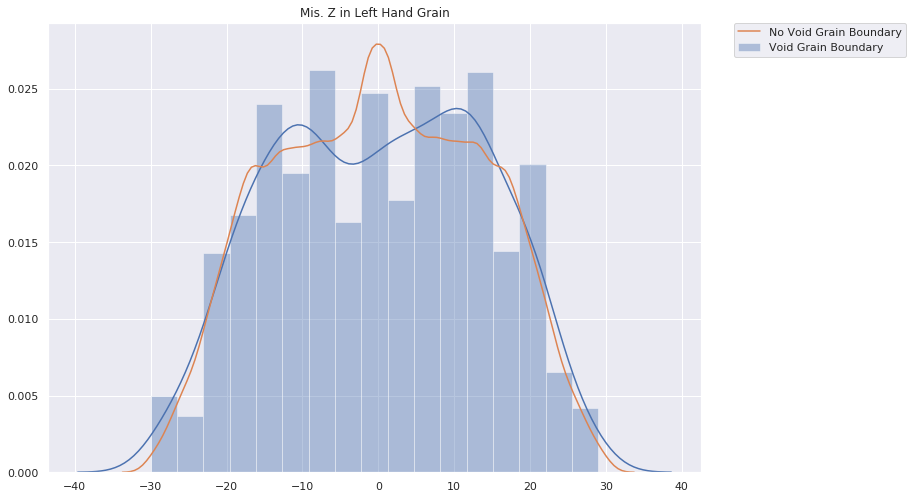

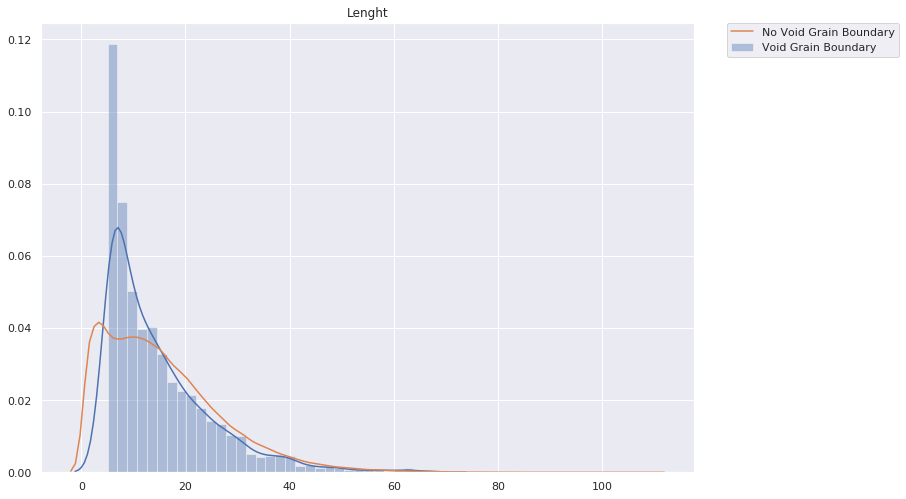

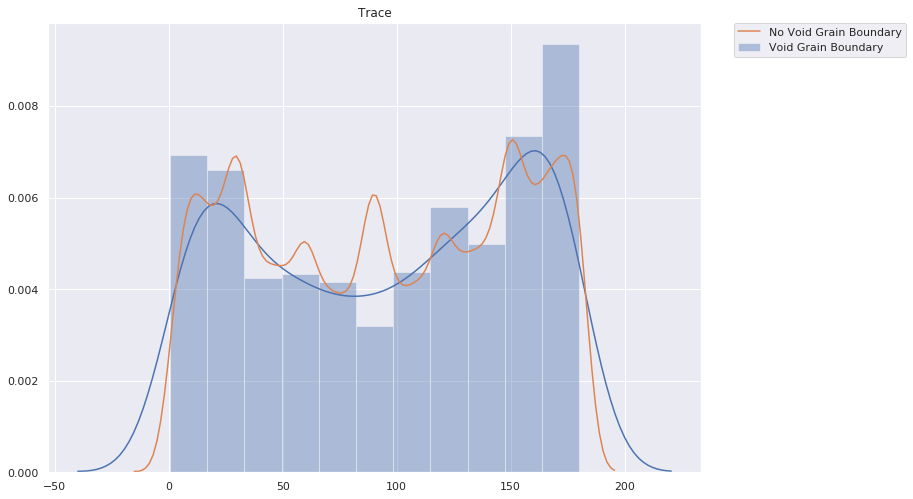

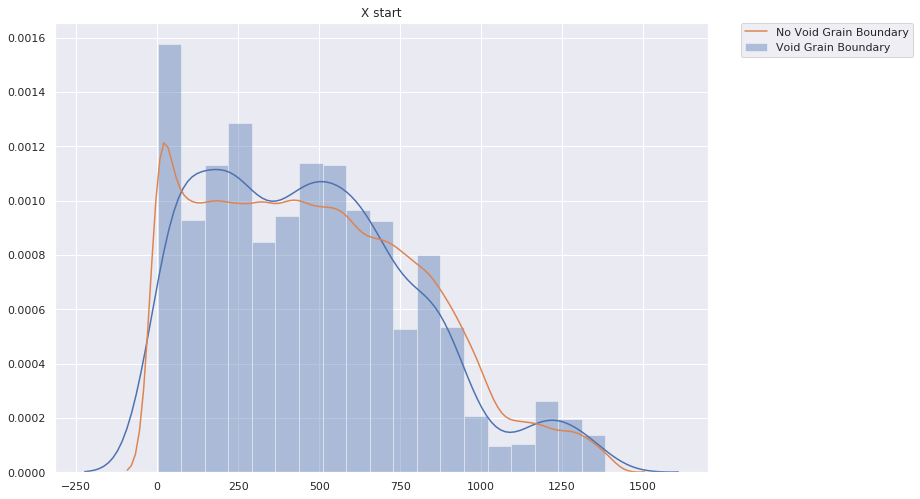

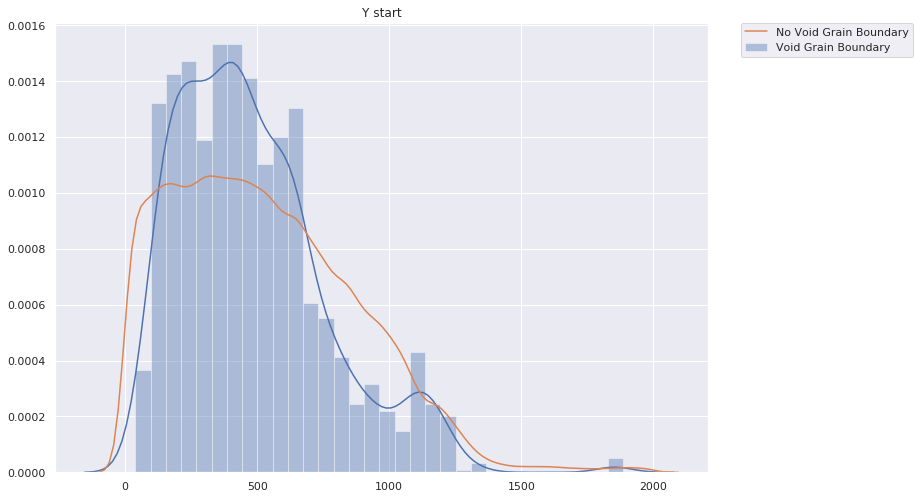

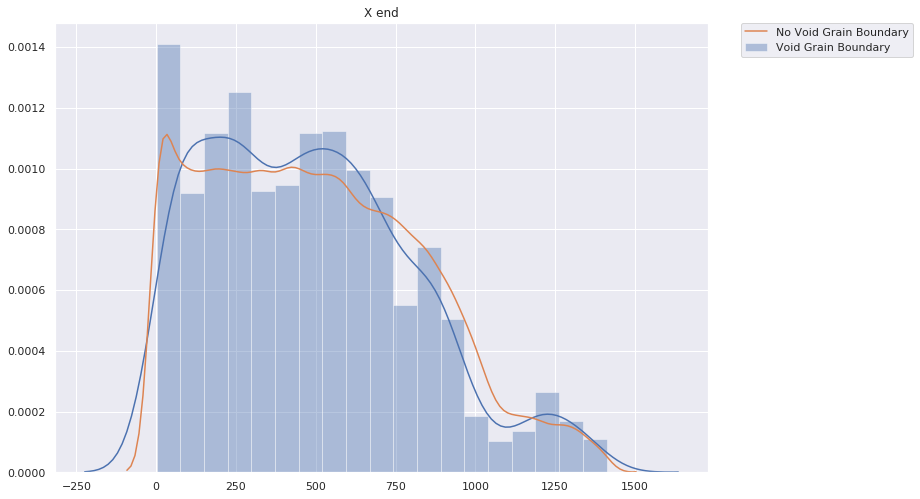

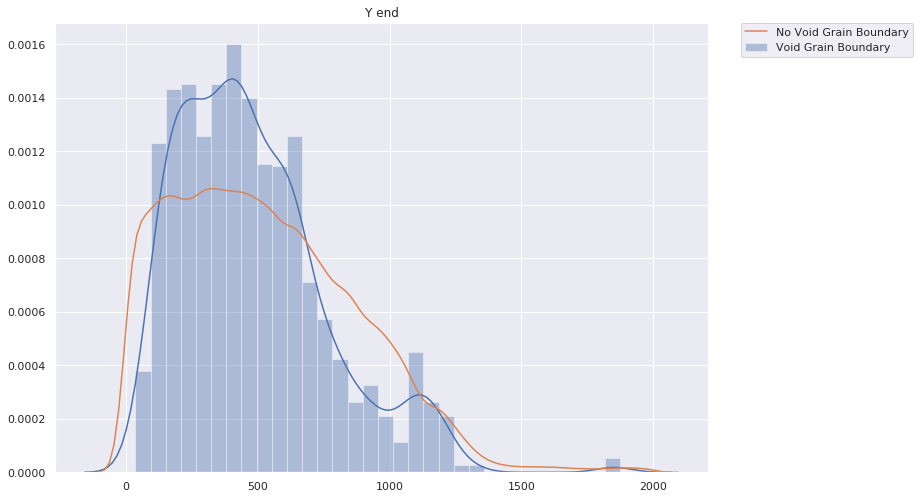

In [149]:
sns.set(rc={'figure.figsize':(11.7,8.27)},)
for (columnName, columnData) in selected_void_dataset.iteritems() and selected_novoid_dataset.iteritems():
    plt.figure()
    plt.title(columnName)
    sns.distplot(selected_void_dataset[[columnName]], label="Void Grain Boundary");
    sns.distplot(selected_novoid_dataset[[columnName]], hist=False, label="No Void Grain Boundary");
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    savename=str(columnName)+'.png'
    plt.savefig(savename, bbox_inches='tight')
    
    #print('Colunm Name : ', columnName)
    #print('Column Contents : ', columnData.values)

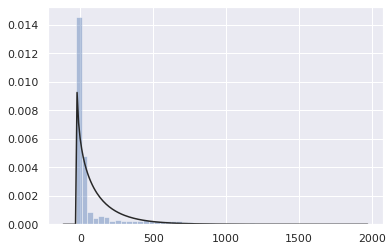

In [33]:
sns.distplot(selected_dataset, kde=False, fit=stats.gamma);

In [34]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(selected_dataset, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'linear_model' is not defined